<a href="https://colab.research.google.com/github/Nisarg0705/html-portfolio/blob/main/Bank_Customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

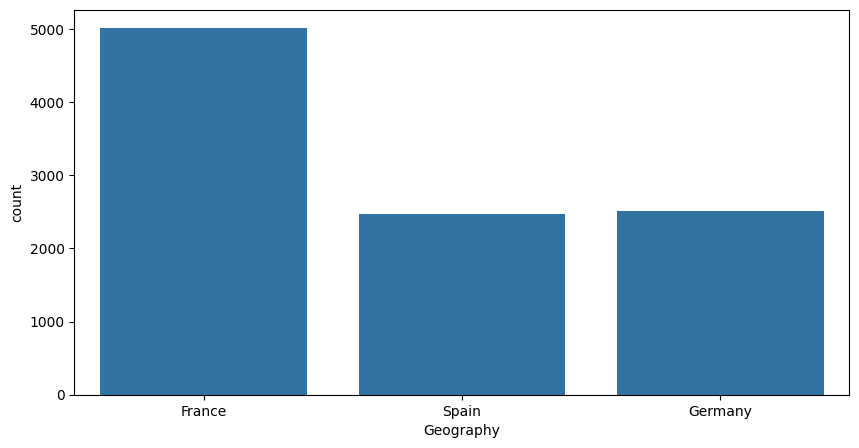

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Geography',data=df)

<Axes: xlabel='Exited', ylabel='count'>

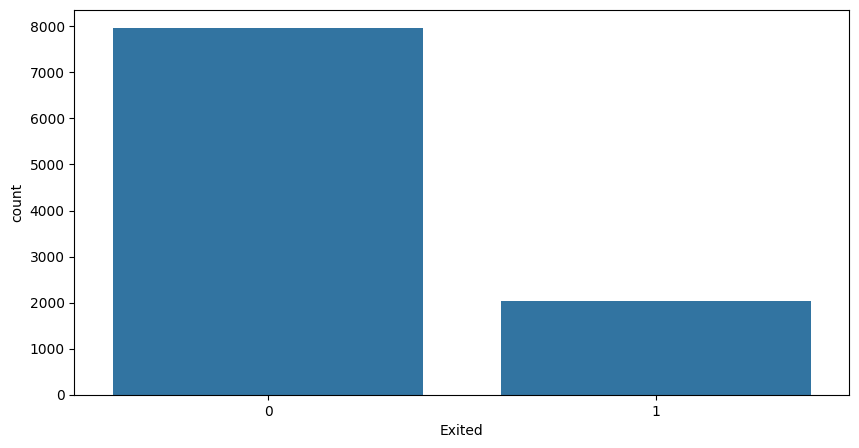

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exited',data=df)

<Axes: xlabel='Gender', ylabel='count'>

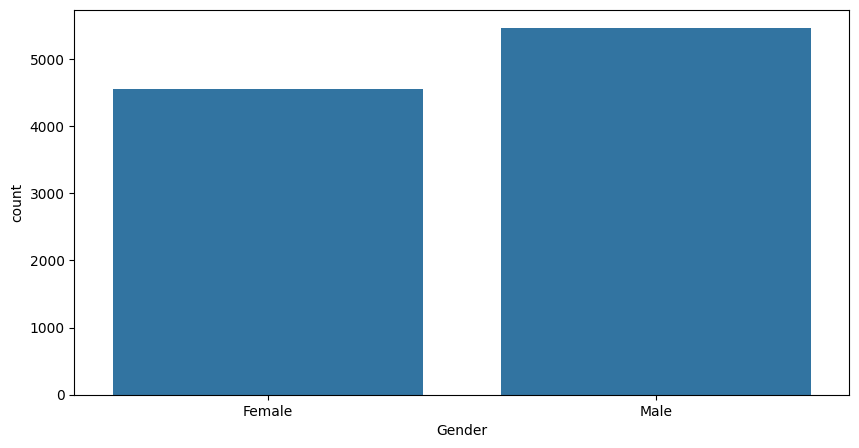

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df)

In [16]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Exited',axis=1),df['Exited'],test_size=0.35)

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
seq=Sequential()

In [25]:
seq.add(Dense(units=10,activation='relu'))
seq.add(Dense(units=5,activation='relu'))
seq.add(Dense(units=1,activation='sigmoid'))

In [26]:
seq.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = seq.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.33)

Epoch 1/100
436/436 [==============================] - 3s 3ms/step - loss: 0.5364 - accuracy: 0.7910 - val_loss: 0.4639 - val_accuracy: 0.7982
Epoch 2/100
436/436 [==============================] - 1s 3ms/step - loss: 0.4623 - accuracy: 0.7928 - val_loss: 0.4303 - val_accuracy: 0.8006
Epoch 3/100
436/436 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.8055 - val_loss: 0.4167 - val_accuracy: 0.8159
Epoch 4/100
436/436 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.8156 - val_loss: 0.4117 - val_accuracy: 0.8206
Epoch 5/100
436/436 [==============================] - 2s 5ms/step - loss: 0.4215 - accuracy: 0.8160 - val_loss: 0.4061 - val_accuracy: 0.8201
Epoch 6/100
436/436 [==============================] - 2s 4ms/step - loss: 0.4151 - accuracy: 0.8195 - val_loss: 0.4036 - val_accuracy: 0.8211
Epoch 7/100
436/436 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8241 - val_loss: 0.4022 - val_accuracy: 0.8201

In [29]:
predicition=seq.predict(X_test)
predicition=predicition>0.5
predicition

110/110 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,predicition))

[[2682  118]
 [ 390  310]]


In [32]:
print(classification_report(y_test,predicition))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2800
           1       0.72      0.44      0.55       700

    accuracy                           0.85      3500
   macro avg       0.80      0.70      0.73      3500
weighted avg       0.84      0.85      0.84      3500



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
pred=rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,pred))

[[2684  116]
 [ 370  330]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2800
           1       0.74      0.47      0.58       700

    accuracy                           0.86      3500
   macro avg       0.81      0.71      0.75      3500
weighted avg       0.85      0.86      0.85      3500



In [38]:
from sklearn.svm import SVC

In [39]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [40]:
p=svc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,p))

[[2722   78]
 [ 430  270]]


In [42]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2800
           1       0.78      0.39      0.52       700

    accuracy                           0.85      3500
   macro avg       0.82      0.68      0.71      3500
weighted avg       0.85      0.85      0.83      3500

